<a href="https://colab.research.google.com/github/Be-B/Data-Visualization/blob/main/ch09_%EC%8B%A4%EC%8A%B5_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA_%E1%84%92%E1%85%A7%E1%86%BC%E1%84%90%E1%85%A2%E1%84%89%E1%85%A9%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_WordCloud_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국어 형태소분석 - 네이버 영화 리뷰 데이터를 이용하여 워드 클라우드 만들기
* 필요한 텍스트 파일 분석



In [ ]:
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Counting objects: 100% (14762/14762), done.
remote: Compressing objects: 100% (13012/13012), done.
remote: Total 14763 (delta 1748), reused 14762 (delta 1748), pack-reused 1 (from 1)
Receiving objects: 100% (14763/14763), 56.19 MiB | 6.32 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (14737/14737), done.


In [ ]:
!cat ./nsmc/ratings_train.txt | head -n 10

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1


In [ ]:
# data 자르고 출력해보기
f = open("/content/nsmc/ratings_test.txt")
lines = f.readlines()[:10000]
print(lines[:10])
print(len(lines))

# s에 데이터 split하여 append
s = []
for line in lines[:10]:
    s.append(line.strip())
print(s)

['id\tdocument\tlabel\n', '6270596\t굳 ㅋ\t1\n', '9274899\tGDNTOPCLASSINTHECLUB\t0\n', '8544678\t뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아\t0\n', '6825595\t지루하지는 않은데 완전 막장임... 돈주고 보기에는....\t0\n', '6723715\t3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??\t0\n', '7898805\t음악이 주가 된, 최고의 음악영화\t1\n', '6315043\t진정한 쓰레기\t0\n', '6097171\t마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다\t0\n', '8932678\t갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다\t0\n']
10000
['id\tdocument\tlabel', '6270596\t굳 ㅋ\t1', '9274899\tGDNTOPCLASSINTHECLUB\t0', '8544678\t뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아\t0', '6825595\t지루하지는 않은데 완전 막장임... 돈주고 보기에는....\t0', '6723715\t3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??\t0', '7898805\t음악이 주가 된, 최고의 음악영화\t1', '6315043\t진정한 쓰레기\t0', '6097171\t마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다\t0', '8932678\t갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다\t0']


In [ ]:
#enumerate 이용하여 데이터 line split 작업
# \t는 문자열 사이 탭 간격 기준
for i, line in enumerate(lines[:10]):
    print("i:", i)
    print("split by tab: ", line.strip().split('\t'))


i: 0
split by tab:  ['id', 'document', 'label']
i: 1
split by tab:  ['6270596', '굳 ㅋ', '1']
i: 2
split by tab:  ['9274899', 'GDNTOPCLASSINTHECLUB', '0']
i: 3
split by tab:  ['8544678', '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', '0']
i: 4
split by tab:  ['6825595', '지루하지는 않은데 완전 막장임... 돈주고 보기에는....', '0']
i: 5
split by tab:  ['6723715', '3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??', '0']
i: 6
split by tab:  ['7898805', '음악이 주가 된, 최고의 음악영화', '1']
i: 7
split by tab:  ['6315043', '진정한 쓰레기', '0']
i: 8
split by tab:  ['6097171', '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다', '0']
i: 9
split by tab:  ['8932678', '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다', '0']


## 긍정/부정 리뷰 분류하기

In [ ]:
##positive/negative 리뷰 분류

positive_reviews = []
negative_reviews = []

# 코드 작성

print("# positive review: ", len(positive_reviews))
print("# negative review: ", len(negative_reviews))

# positive review:  5061
# negative review:  4938


In [ ]:
#[간단 파이썬 문법 테스트] join을 이용하여 리스트 안의 스트링 합치기

test_list = ['나는', '피자가', '좋아', 'ㅎㅎ']
result1 = '\n'.join(test_list)
result2 = '\t'.join(test_list)
result3 = ' '.join(test_list)
print(result1)
print(result2)
print(result3)

나는
피자가
좋아
ㅎㅎ
나는	피자가	좋아	ㅎㅎ
나는 피자가 좋아 ㅎㅎ


In [ ]:
## 데이터에 적용 => 긍정/부정 각각 문장 합치기
positive_txt = ' '.join(positive_reviews)
negative_txt = ' '.join(negative_reviews)
print('# positivie txt: ', len(positive_txt), positive_txt[:100])
print('# negative txt: ', len(negative_txt), negative_txt[:100])

# positivie txt:  177137 굳 ㅋ 음악이 주가 된, 최고의 음악영화 이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네.. 괜찮네요오랜만포켓몬스터잼밌어요 청춘은 아름답다 그 아름
# negative txt:  182505 GDNTOPCLASSINTHECLUB 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아 지루하지는 않은데 완전 막장임... 돈주고 보기에는.... 3D만 아니었


# 리뷰 형태소 분석하여 wordcloud 만들기

### 형태소란?
- 가장 최소한의 의미를 포함하고 있는 단어

  ex) 컴퓨터, 가방, 나, 소나기

- python에는 형태소분석을 위한 여러가지 라이브러리가 있음


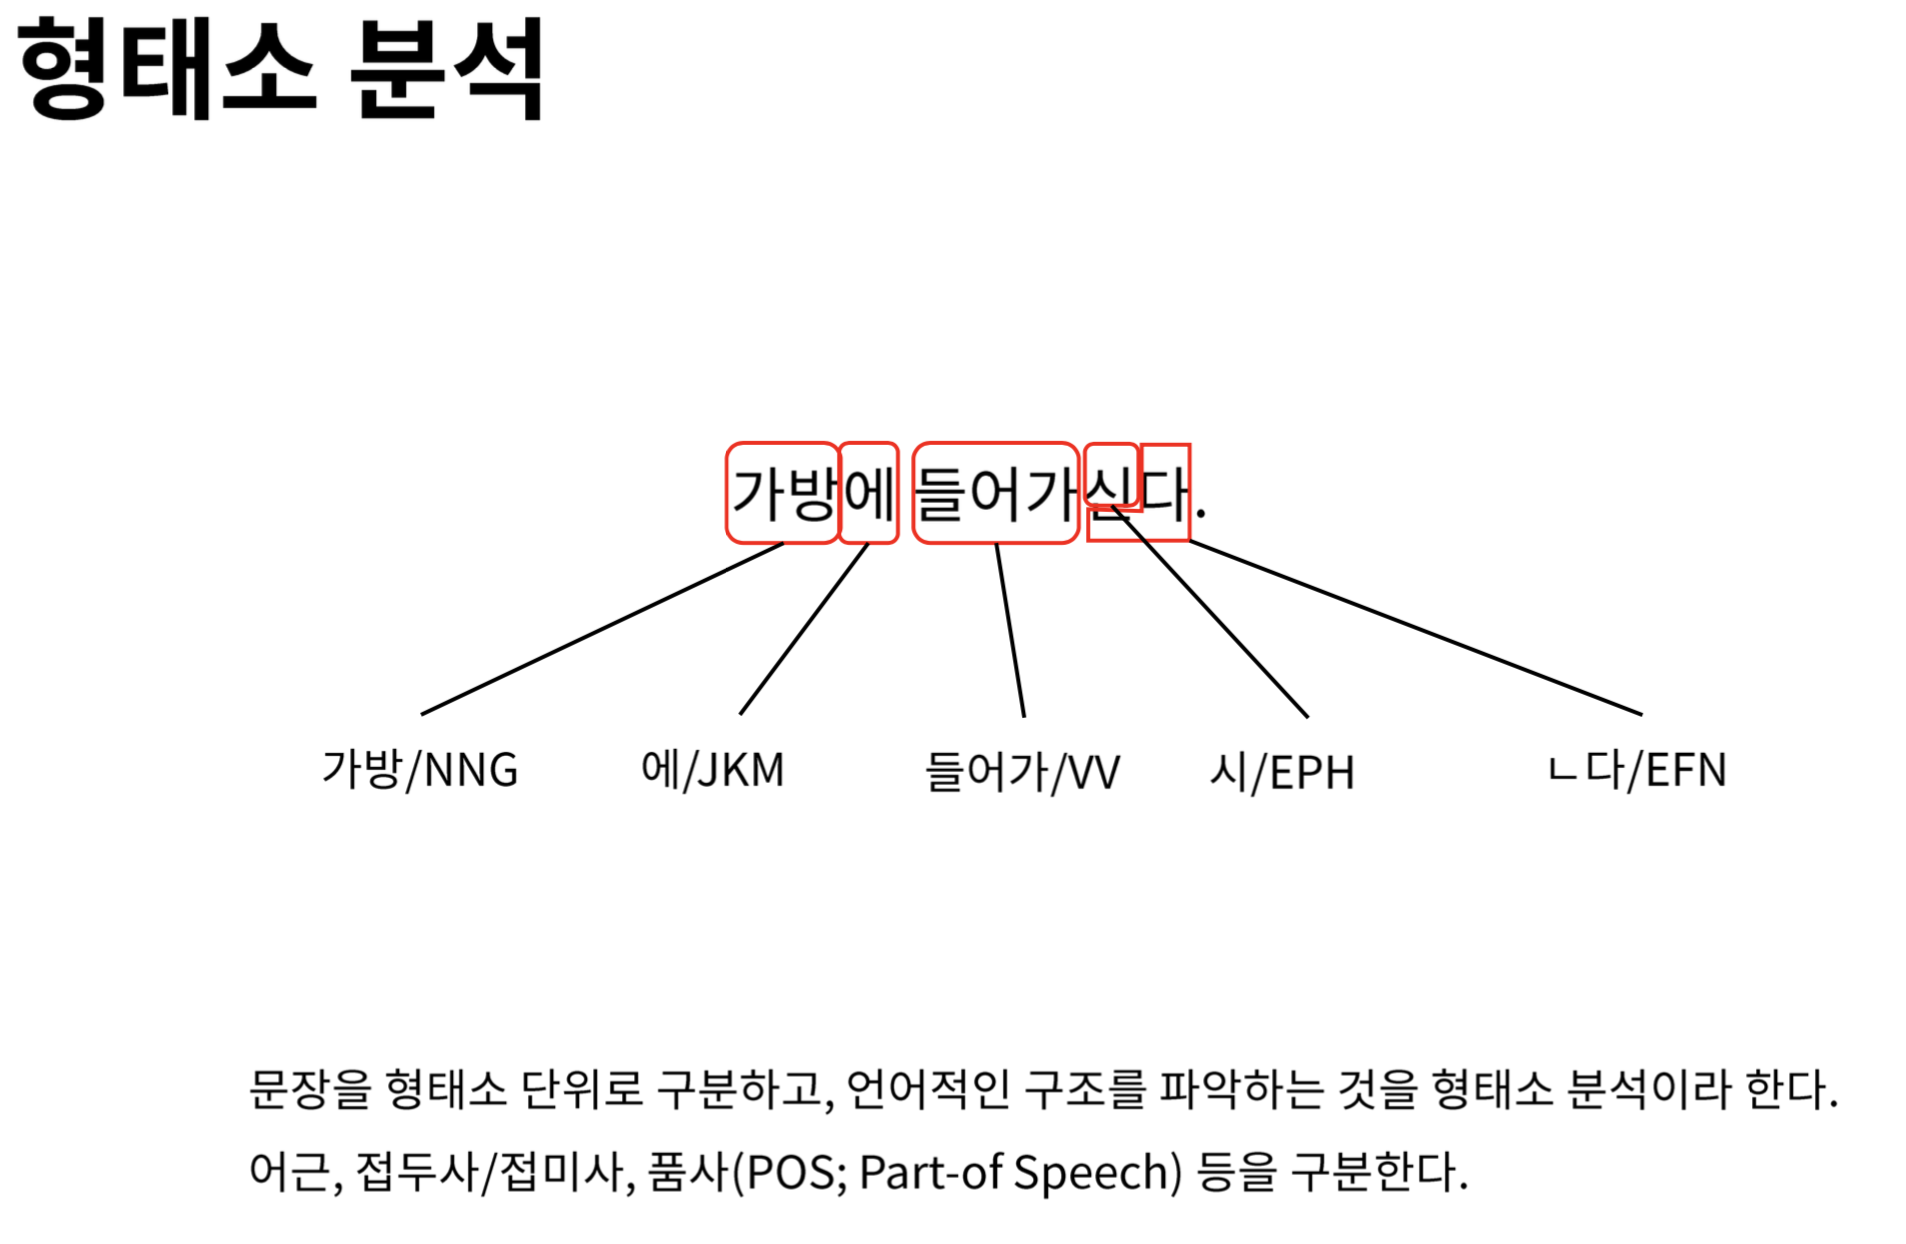

In [ ]:
# konlpy 패키지 다운로드
# Error 발생 시 다시 실행
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 26.9 MB/s eta 0:00:00


In [ ]:
# konlpy 관련 패키지 import
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter

#kkma = Kkma()
okt = Okt()
#komoran = Komoran()
#hannanum = Hannanum()

In [ ]:
#positive txt에 대하여 형태소 분석

positive_morphs = okt.morphs(positive_txt)

In [ ]:
print(positive_morphs[:10])
print(len(positive_morphs))

['굳', 'ㅋ', '음악', '이', '주가', '된', ',', '최고', '의', '음악']
69685


In [ ]:
#Counter를 이용하여 가장 많이 나오는 형태소 찾기

from collections import Counter
count_pos = Counter(positive_morphs)
count_pos_list = count_pos.most_common(100) # 최대 빈도수 카운트하여 100개까지 보여줘라
for morph in count_pos_list:
  print(morph)

('.', 2303)
('이', 1882)
('영화', 1726)
('의', 1294)
('에', 901)
('..', 848)
('을', 833)
('가', 795)
('...', 669)
('도', 616)
('들', 614)
(',', 558)
('를', 546)
('는', 482)
('은', 452)
('정말', 426)
('너무', 408)
('!', 405)
('적', 381)
('최고', 369)
('한', 329)
('에서', 290)
('진짜', 281)
('다', 270)
('잘', 259)
('~', 256)
('연기', 253)
('으로', 242)
('과', 238)
('감동', 233)
('와', 232)
('드라마', 231)
('그', 227)
('생각', 222)
('?', 217)
('로', 216)
('점', 216)
('만', 212)
('인', 212)
('것', 198)
('내', 197)
('때', 195)
('이다', 190)
('요', 188)
('보고', 179)
('평점', 178)
('나', 178)
('사람', 176)
('!!', 171)
('다시', 166)
('중', 162)
('게', 161)
('사랑', 158)
('본', 154)
('더', 149)
('하는', 144)
('ㅋㅋ', 143)
('이런', 139)
('수', 137)
('하고', 134)
('배우', 133)
('보다', 132)
('까지', 129)
('마지막', 129)
('....', 127)
('봤는데', 127)
('왜', 126)
('말', 124)
('스토리', 123)
('ㅠㅠ', 122)
('못', 121)
('좋은', 121)
('있는', 115)
('완전', 114)
('10', 114)
('고', 113)
('지금', 112)
('볼', 112)
('아', 109)
('재밌게', 108)
('작품', 107)
('봐도', 106)
('입니다', 105)
('안', 104)
('네', 104)
('^^', 101)

In [ ]:
# 특정한 형태소 제외시키기 (stopwords)
# 위에 예시를 보면 'ㅎㅎ' 'ㅋ' '^^' 이런 의미 없는 것들이 많이 카운트 됨 => 제거

# 나만의 stopwords 리스트 만들기
my_stopwords = ['^^', '1', 'ㅋㅋ', 'ㅋㅋㅋ', '~', '!', '?', '.', '..', '...', 'ㅋ', '이', '....', '!!!', '!!', 'ㅜㅜ', 'ㅠㅠ', '~~', '10']

## stopwords를 제외한 positive 형태소 단어 모으기
new_positive_morphs = []
for index, morph in enumerate(positive_morphs):
  if len(morph) >= 2 and morph not in my_stopwords: #길이가 1인 형태소 제외, stopwords 리스트에 있는 형태소 제외
    new_positive_morphs.append(morph)

# #pop, del, remove
# list.remove('value')

count_pos = Counter(new_positive_morphs)
count_pos_list = count_pos.most_common(100)
for morph in count_pos_list:
  print(morph)

('영화', 1726)
('정말', 426)
('너무', 408)
('최고', 369)
('에서', 290)
('진짜', 281)
('연기', 253)
('으로', 242)
('감동', 233)
('드라마', 231)
('생각', 222)
('이다', 190)
('보고', 179)
('평점', 178)
('사람', 176)
('다시', 166)
('사랑', 158)
('하는', 144)
('이런', 139)
('하고', 134)
('배우', 133)
('보다', 132)
('까지', 129)
('마지막', 129)
('봤는데', 127)
('스토리', 123)
('좋은', 121)
('있는', 115)
('완전', 114)
('지금', 112)
('재밌게', 108)
('작품', 107)
('봐도', 106)
('입니다', 105)
('역시', 94)
('장면', 92)
('그냥', 91)
('재미', 90)
('명작', 89)
('ㅎㅎ', 86)
('액션', 84)
('가슴', 82)
('마음', 81)
('내용', 80)
('보는', 79)
('눈물', 79)
('인생', 79)
('좋다', 76)
('감독', 74)
('여운', 74)
('그리고', 74)
('기억', 73)
('하나', 72)
('없는', 72)
('이야기', 67)
('많이', 65)
('현실', 65)
('재밌다', 64)
('대박', 64)
('처음', 64)
('매력', 63)
('모습', 63)
('아이', 62)
('정도', 62)
('해서', 62)
('한다', 62)
('하게', 62)
('가장', 61)
('이렇게', 61)
('한번', 61)
('주인공', 61)
('이영화', 61)
('같은', 60)
('에게', 59)
('추천', 59)
('재미있게', 58)
('보면', 58)
('보기', 58)
('였다', 57)
('느낌', 57)
('이고', 57)
('인간', 56)
('우리', 56)
('많은', 55)
('재밌어요', 55)
('봤다', 54)
('합

In [ ]:
#To-do negative_morphs 리스트로 가장 많이 나타나는 100개의 형태소 프린트하기 #top10개


# 반대로 부정도 해보기

In [ ]:
# 형태소분석 말고도 명사만 추출해도 어느정도 stopword는 제거됨
positive_nouns = okt.nouns(positive_txt)
#negative_nouns = okt.nouns(negative_txt)

In [ ]:
print('nouns: ', positive_nouns[:10])

nouns:  ['음악', '주가', '최고', '음악', '영화', '이별', '아픔', '뒤', '인연', '기쁨']


In [ ]:
# wordcloud
#wordcloud 설치

!pip install wordcloud

In [ ]:
# 워드클라우드의 사용법을 알아보자
from wordcloud import WordCloud

texts = '이것 은 예문 입니다. 여러분 의 문장을 넣 으세요'
wordcloud = WordCloud(
    font_path = '/content/NanumSquareR.ttf',
    width = 800,
    height = 800)
wordcloud = wordcloud.generate_from_text(texts)

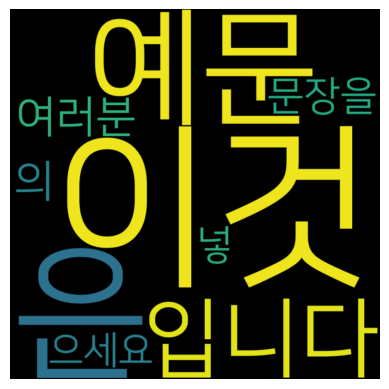

In [ ]:
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림으로 볼 수 있게 해줌
import matplotlib.pyplot as plt

plt.figure()
plt.axis('off')  # x축 지우기
plt.imshow(wordcloud, interpolation='bilinear')
# interpolation은 이미지를 어떻게 처리해서 보여줄지 결정
# bilinear는 부드럽게
plt.show()

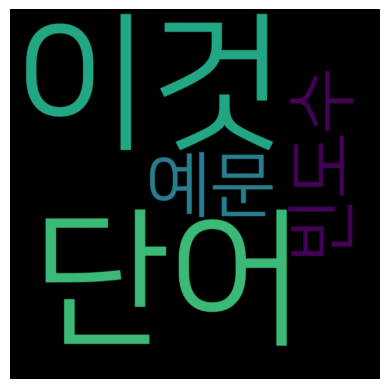

In [ ]:
#빈도 수에 기반하여 wordcloud 만들기

keywords = {'이것':5, '예문':3, '단어':5, '빈도수':3}
wordcloud = wordcloud.generate_from_frequencies(keywords)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
## positive nouns 리스트에서 가장 많이 나오는 100개 noun 추출, tuple을 dictionary 형태로 만들기



pos_noun_list:  ('영화', 1726)
value of 영화:  1726


In [ ]:
#wordcloud 만들기

wordcloud = WordCloud(
    background_color='white',
    font_path = '/content/NanumSquareR.ttf',
    width = 1000,
    height = 800)

wordcloud = wordcloud.generate_from_frequencies(pos_noun_dict)
# 파일로 저장
wordcloud.to_file('/content/my_cloud.jpg')

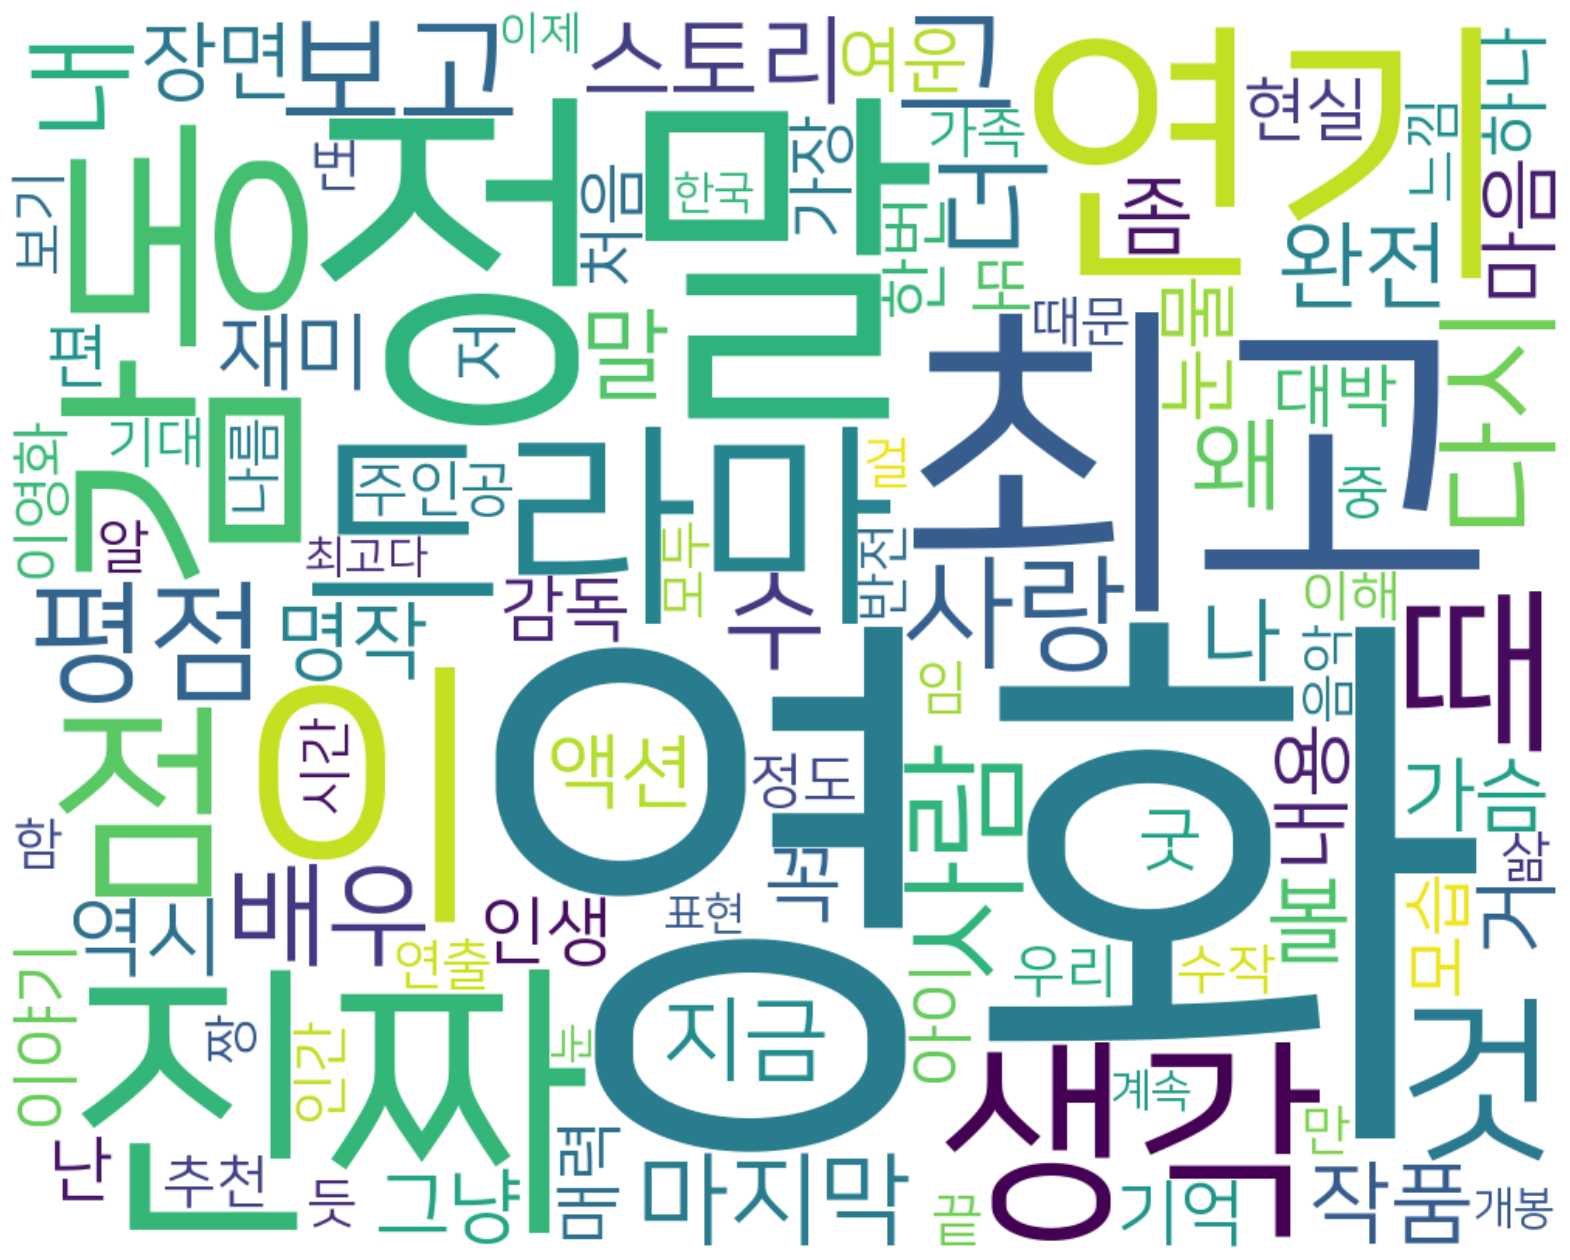

In [ ]:
# 그래프 바로보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()